<a href="https://colab.research.google.com/github/SantiData87/yFinance/blob/main/Parabolic_SAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://x.com/nacho_java/status/1835830920047153279

"SAR" significa Stop And Reverse, lo que implica que este indicador sugiere momentos en los que deberías detener (stop) tu posición en una tendencia y cambiar (reverse) la dirección de tu operación.

Cuando los puntos están por debajo del precio:
Esto sugiere que el activo está en una tendencia alcista.

Cuando los puntos están por encima del precio:
Esto indica que el activo está en una tendencia bajista.

A medida que el precio se mueve, el Parabolic SAR "sigue" al precio en forma de parábola. Si el precio cambia lo suficiente como para cruzar el SAR, esto indica que es probable que la tendencia cambie de dirección.

In [1]:
# Descargar el código fuente de TA-Lib
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz

# Descomprimir el archivo descargado
!tar -xvzf ta-lib-0.4.0-src.tar.gz

# Cambiar al directorio descomprimido
%cd ta-lib/

# Configurar e instalar TA-Lib
!./configure --prefix=/usr
!make
!make install

# Regresar al directorio principal
%cd ..

# Instalar la librería TA-Lib de Python usando pip
!pip install TA-Lib


--2024-09-17 14:52:03--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-09-17 14:52:03--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-09-17 14:52:03--  http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Res

[*********************100%***********************]  1 of 1 completed


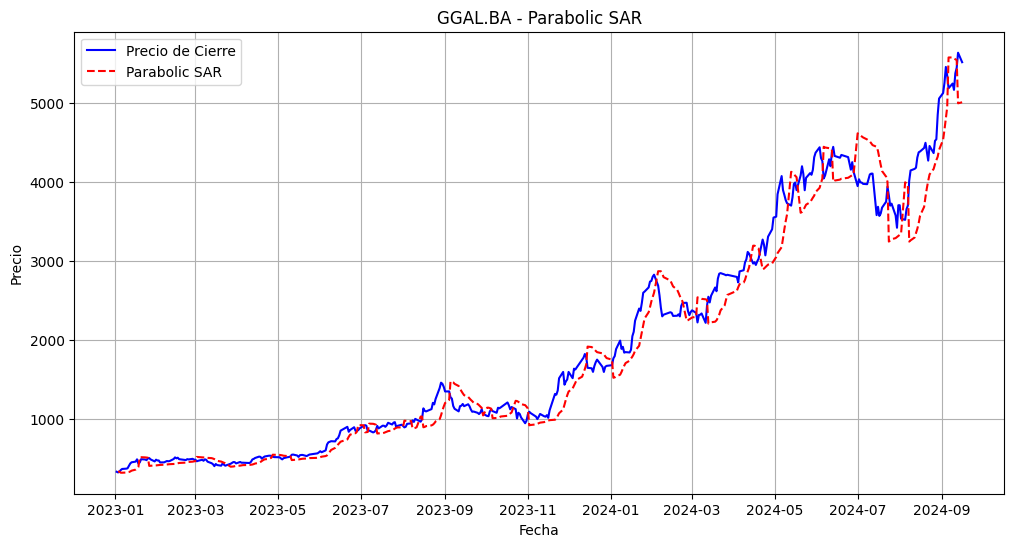

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import talib as ta
from datetime import date

# Fecha de hoy
today = date.today()

# Descargar datos del activo
ticker = 'GGAL.BA'
data = yf.download(ticker, start='2023-01-01', end=today)

# Calcular el Parabolic SAR
data['SAR'] = ta.SAR(data['High'], data['Low'], acceleration=0.02, maximum=0.2)

# Graficar los precios de cierre y el Parabolic SAR
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Precio de Cierre', color='blue')
plt.plot(data['SAR'], label='Parabolic SAR', linestyle='--', color='red')

plt.title(f'{ticker} - Parabolic SAR')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend(loc='best')
plt.grid(True)
plt.show()
